In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats

In [2]:
lengths = ['1', '40', '79', '118', '157', '196']
widths = ['8', '12', '15']

In [3]:
viscos = pd.DataFrame()
for ns in lengths:
    for w in widths:
        for i in range(1,6):
            viscos[f'{w}nm-{ns}ns-r{i}-visc'] = pd.Series(np.load(f'../dmpc-{w}nm/r{i}/{ns}ns_sim.npz', 
                                                     allow_pickle=True)['arr_3'])
            viscos[f'{w}nm-{ns}ns-r{i}-auto'] = pd.Series(np.load(f'../dmpc-{w}nm/r{i}/{ns}ns_sim.npz', 
                                                     allow_pickle=True)['arr_2'])
    viscos[f'{ns}ns-time'] = pd.Series(np.load(f'../dmpc-8nm/r1/{ns}ns_sim.npz',
                                                 allow_pickle=True)['arr_1'])

In [4]:
viscos.head()

,8nm-1ns-r1-visc,8nm-1ns-r1-auto,8nm-1ns-r2-visc,8nm-1ns-r2-auto,8nm-1ns-r3-visc,8nm-1ns-r3-auto,8nm-1ns-r4-visc,8nm-1ns-r4-auto,8nm-1ns-r5-visc,8nm-1ns-r5-auto,...,15nm-196ns-r1-auto,15nm-196ns-r2-visc,15nm-196ns-r2-auto,15nm-196ns-r3-visc,15nm-196ns-r3-auto,15nm-196ns-r4-visc,15nm-196ns-r4-auto,15nm-196ns-r5-visc,15nm-196ns-r5-auto,196ns-time
0,2.265770e-13,15815.284426,2.287890e-13,15967.996023,2.283271e-13,15944.020331,2.295271e-13,16019.862652,2.290353e-13,15981.170030,...,5839.926781,1.539882e-13,5837.790453,1.538686e-13,5829.344208,1.539692e-13,5839.879356,1.540706e-13,5843.408388,0.000
1,4.391832e-13,14840.114124,4.437002e-13,14999.419701,4.428042e-13,14976.871571,4.450223e-13,15040.512370,4.440964e-13,15006.103571,...,-128.542484,1.162240e-12,-127.280422,1.159913e-12,-127.344826,1.159598e-12,-127.507763,1.159224e-12,-126.714814,0.196
2,6.133900e-13,12159.798202,6.204476e-13,12335.834338,6.192322e-13,12319.923223,6.219797e-13,12350.755623,6.207540e-13,12326.463962,...,309.464274,1.482466e-12,307.618917,1.480534e-12,307.187155,1.479592e-12,308.080751,1.478429e-12,306.586878,0.392
3,7.338827e-13,8410.500468,7.437457e-13,8605.414894,7.424830e-13,8606.570135,7.451119e-13,8594.027506,7.437066e-13,8579.142825,...,23.142082,1.688143e-12,18.599200,1.683598e-12,19.424659,1.684340e-12,19.908283,1.682745e-12,18.259502,0.588
4,7.968528e-13,4395.370825,8.096805e-13,4601.823684,8.088480e-13,4634.248624,8.107454e-13,4580.892679,8.091691e-13,4567.707941,...,164.454048,1.870405e-12,164.388410,1.865549e-12,164.844411,1.865749e-12,163.209361,1.863451e-12,165.127447,0.784


In [5]:
for w in widths:
    for ns in lengths:
        viscos[f'{w}nm-{ns}ns-mean'] = np.mean(
            [viscos[f'{w}nm-{ns}ns-r{i}-visc'] for i in range(1,6)],
            axis=0
        )

In [6]:
viscos['8nm-196ns-mean']

0         2.284386e-13
1         1.426635e-12
2         1.894045e-12
3         2.226204e-12
4         2.538512e-12
              ...     
499995   -1.509228e-11
499996   -1.509050e-11
499997   -1.508821e-11
499998   -1.508479e-11
499999   -1.508384e-11
Name: 8nm-196ns-mean, Length: 500000, dtype: float64

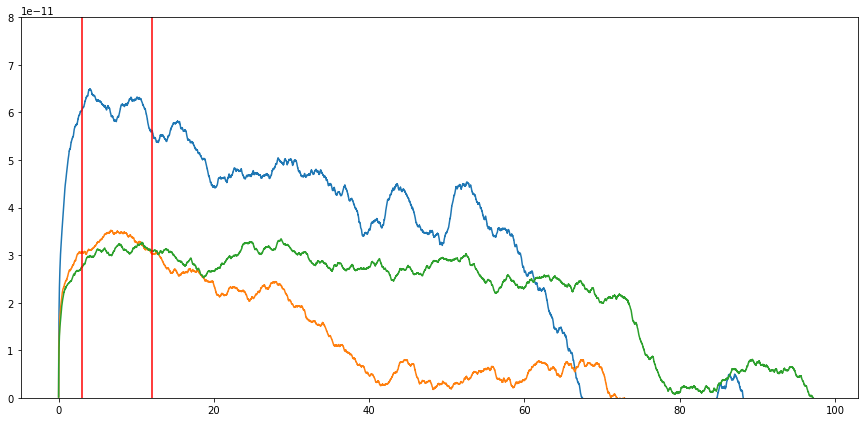

In [7]:
plt.figure(figsize=(15,7))
for w in widths:
    plt.plot(viscos[f'196ns-time']/1000, viscos[f'{w}nm-196ns-mean'])
plt.ylim(0,8e-11)
plt.axvline(3, c='r')
plt.axvline(12, c='r')

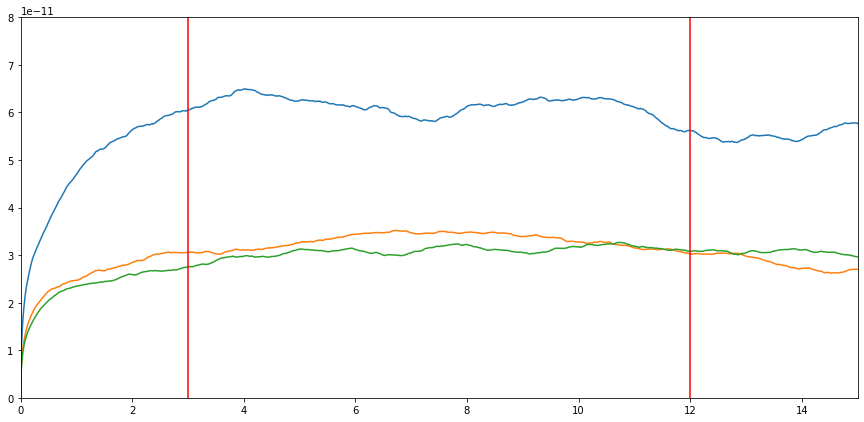

In [8]:
plt.figure(figsize=(15,7))
for w in widths:
    plt.plot(viscos[f'196ns-time']/1000, viscos[f'{w}nm-196ns-mean'])
plt.ylim(0,8e-11)
plt.xlim(0,15)
plt.axvline(3, c='r')
plt.axvline(12, c='r')

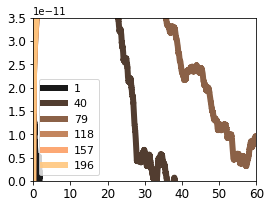

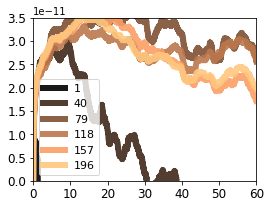

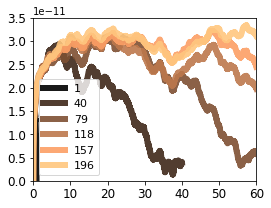

In [45]:
for w in widths:
    plt.figure(figsize=(4,3))
    for c, ns in enumerate(lengths):
        plt.plot(viscos[f'{ns}ns-time']/1000*2, viscos[f'{w}nm-{ns}ns-mean'],
                 c = plt.cm.copper(plt.Normalize(0,5)(c)), linewidth=6, alpha=0.9,
                label=str(ns))
#     plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0,196), cmap = 'viridis'))
    plt.ylim(0,3.5e-11)
#     plt.xlim(0,10)
    plt.xlim(0,60)
#     plt.axvline(3, c='r')
#     plt.axvline(12, c='r')
    plt.legend(loc=3, fontsize=11)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

In [43]:
for c, ns in enumerate(lengths):
#         plt.plot(viscos[f'{ns}ns-time']/1000, viscos[f'{w}nm-{ns}ns-mean'],
#                  c = plt.cm.copper(plt.Normalize(0,5)(c)), linewidth=6, alpha=0.9,
#                 label=str(ns))
    print(ns, np.array(viscos[f'{ns}ns-time'])[-1]*2)

1 1999.996
40 39999.92
79 77999.844
118 117999.764
157 155999.688
196 195999.608


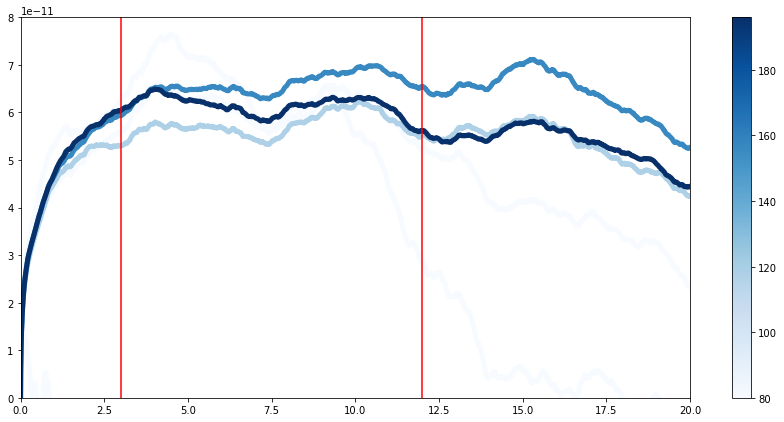

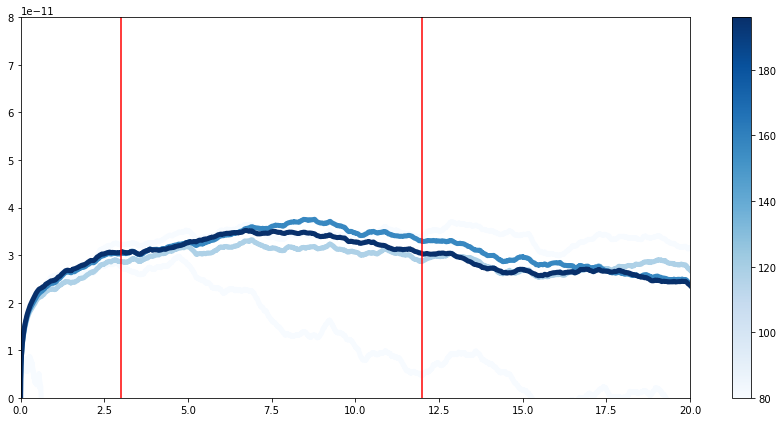

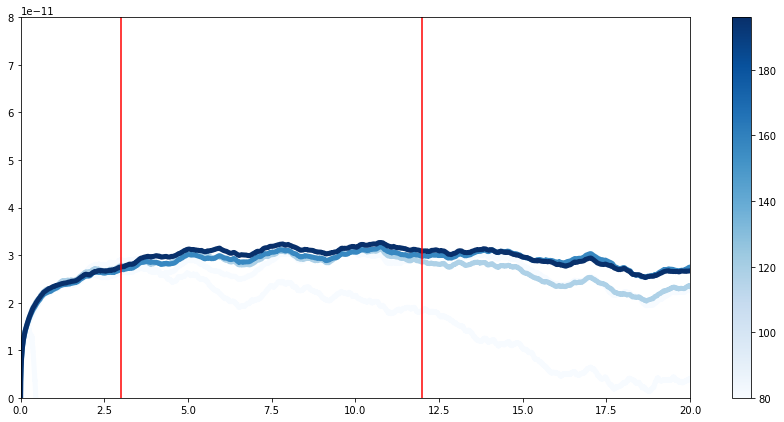

In [10]:
for w in widths:
    plt.figure(figsize=(15,7))
    for c, ns in enumerate(lengths):
        plt.plot(viscos[f'{ns}ns-time']/1000, viscos[f'{w}nm-{ns}ns-mean'],
                 c = plt.cm.Blues(plt.Normalize(80,196)(int(ns))), linewidth=5)
    plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(80,196), cmap = 'Blues'))
    plt.ylim(0,8e-11)
#     plt.xlim(0,10)
    plt.ylim(0,8e-11)
    plt.xlim(0,20)
    plt.axvline(3, c='r')
    plt.axvline(12, c='r')
    plt.show()

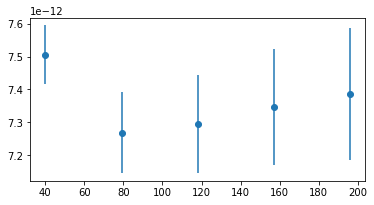

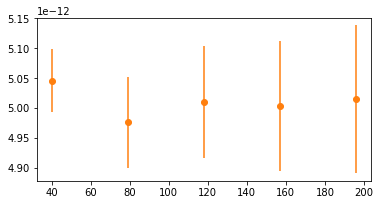

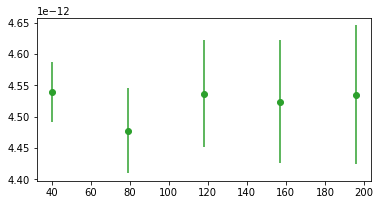

In [11]:
for c, w in enumerate(widths):
    plt.figure(figsize=(6,3))
    for ns in lengths[1:]:
        x = float(ns)
        y = np.mean(viscos[f'{w}nm-{ns}ns-mean'][3000//int(ns):12000//int(ns)])
        yerr = float(sp.stats.sem(viscos[f'{w}nm-{ns}ns-mean'][3000//int(ns):12000//int(ns)]))
        plt.errorbar(x = x, y = y, yerr = yerr, marker='.', ms=12, c=f'C{c}')
    plt.show()

40
79
118
157
196
[c,w,x,y, yerr] 0 8 196.0 7.386920650629981e-12 2.004029051264935e-13
40
79
118
157
196
[c,w,x,y, yerr] 1 12 196.0 5.0145929443229125e-12 1.2406123522823227e-13
40
79
118
157
196
[c,w,x,y, yerr] 2 15 196.0 4.535046899004862e-12 1.1092857116781911e-13


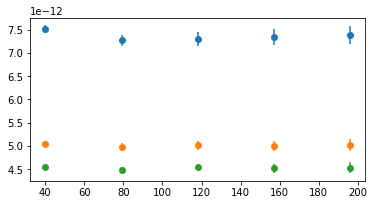

In [12]:
plt.figure(figsize=(6,3))
for c, w in enumerate(widths):
    for ns in lengths[1:]:
        x = float(ns)
        y = np.mean(viscos[f'{w}nm-{ns}ns-mean'][3000//int(ns):12000//int(ns)])
        yerr = float(sp.stats.sem(viscos[f'{w}nm-{ns}ns-mean'][3000//int(ns):12000//int(ns)]))
        plt.errorbar(x = x, y = y, yerr = yerr, marker='.', ms=12, c=f'C{c}')
        print(ns)
        if int(ns)==196:
            print('[c,w,x,y, yerr]',c,w,x,y, yerr)

In [13]:
plt.figure(figsize=(12,7))
for c, ns in enumerate(lengths):
    plt.plot(viscos[f'{ns}-time']/1000, viscos[f'{ns}-visc'], c = plt.cm.Reds(plt.Normalize(0,5)(c)), linewidth=3)
plt.ylim(2e-11, 8e-11)
plt.xlim(1e-1, 10)

plt.yscale('log')
plt.xscale('log')

KeyError: '1-time'

<Figure size 864x504 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,7))
for c, ns in enumerate(lengths):
    plt.plot(viscos[f'{ns}-time'], viscos[f'{ns}-auto'], '.', c = plt.cm.Reds(plt.Normalize(0,6)(c)))
plt.ylim(-1000,4000)
# plt.yscale('symlog')
# plt.yscale('log')
plt.xlim(np.array([-0.1,1])*2)

# plt.yscale('symlog')
# plt.xscale('log')